In [422]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy
import scipy.spatial
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [280]:
dados = pd.read_csv("Country-data.csv", sep=',', index_col=0)
dados.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [281]:
dados.shape

(167, 9)

In [447]:
dados.info

<bound method DataFrame.info of                      child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia  

## Escolha de base dados

#### Questão 3

In [282]:
# Normalização dos dados
((dados-dados.min())/(dados.max()-dados.min())).describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


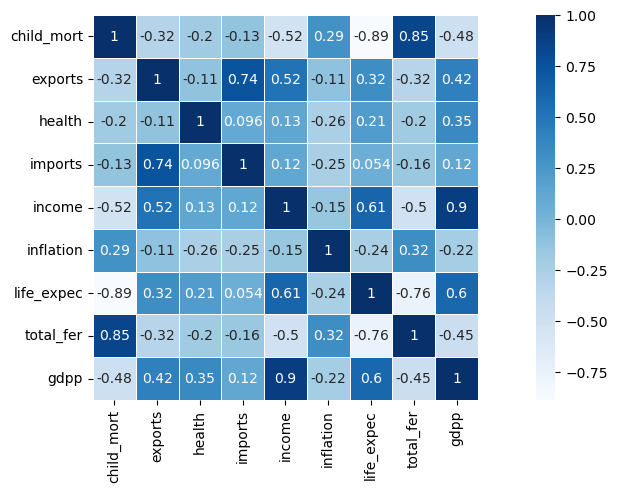

In [283]:
corr = dados.corr()
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr, square=True, linewidths=.5, annot=True, cmap="Blues");

Análise Exploratória:
    
As colunas gdpp(PIB per capita) e income(Renda), imports(Importações) e exports(Exportações), child_mort(Óbito) e total_fert(Taxa de natalidade) são altamente correlacionados positivamente considerando que life_expec(Expectativa de vida) e child_mort(Óbito) são altamente correlacionados positivamente

#### Questão 4

In [284]:
scaling=StandardScaler()
scaled=scaling.fit_transform(dados)

In [285]:
scaled_dados=pd.DataFrame(scaled,columns=dados.columns)

In [286]:
scaled_dados.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Clusterização

#### Questão 1 - K-means

In [383]:
k = KMeans(n_clusters=3)
k_fit = k.fit(scaled_dados)

In [384]:
# Registros em cada cluster
pd.Series(k.labels_).value_counts()

2    84
0    47
1    36
dtype: int64

In [385]:
cluster_labels = k.fit_predict(scaled_dados)

In [386]:
cluster_labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [387]:
cl = cluster_labels
kmeans_df = pd.DataFrame(dados)
kmeans_df['clusters'] = cl
kmeans_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,clusters_dist
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,3.707487
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0,0.837031
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,1.414632
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,4.323613
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,1.062536
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0,2.164925
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,1.115102
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,3.575302
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,3.520060


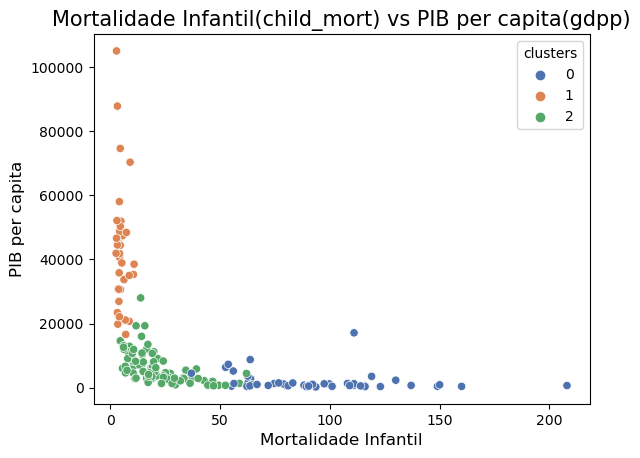

In [439]:
sns.scatterplot(data=cluster_dados, x="child_mort", y="gdpp", hue="clusters", palette="deep")
plt.title("Mortalidade Infantil(child_mort) vs PIB per capita(gdpp)", fontsize=15)
plt.xlabel("Mortalidade Infantil", fontsize=12)
plt.ylabel("PIB per capita", fontsize=12)
plt.show()

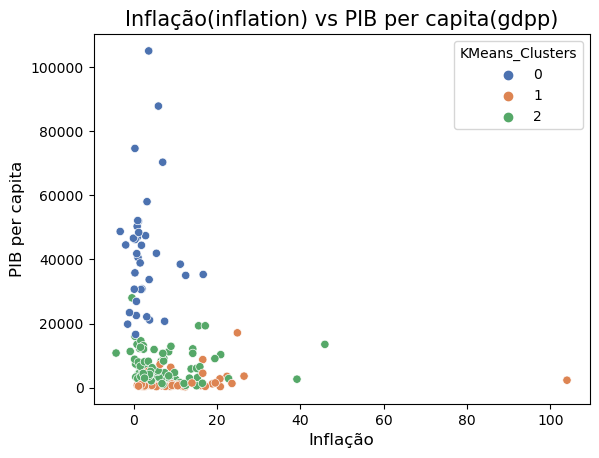

In [440]:
sns.scatterplot(data=cluster_dados, x="inflation", y="gdpp", hue="KMeans_Clusters", palette="deep")
plt.title("Inflação(inflation) vs PIB per capita(gdpp)", fontsize=15)
plt.xlabel("Inflação", fontsize=12)
plt.ylabel("PIB per capita", fontsize=12)
plt.show()

#### Questão 1 - Clusterização Hierárquica

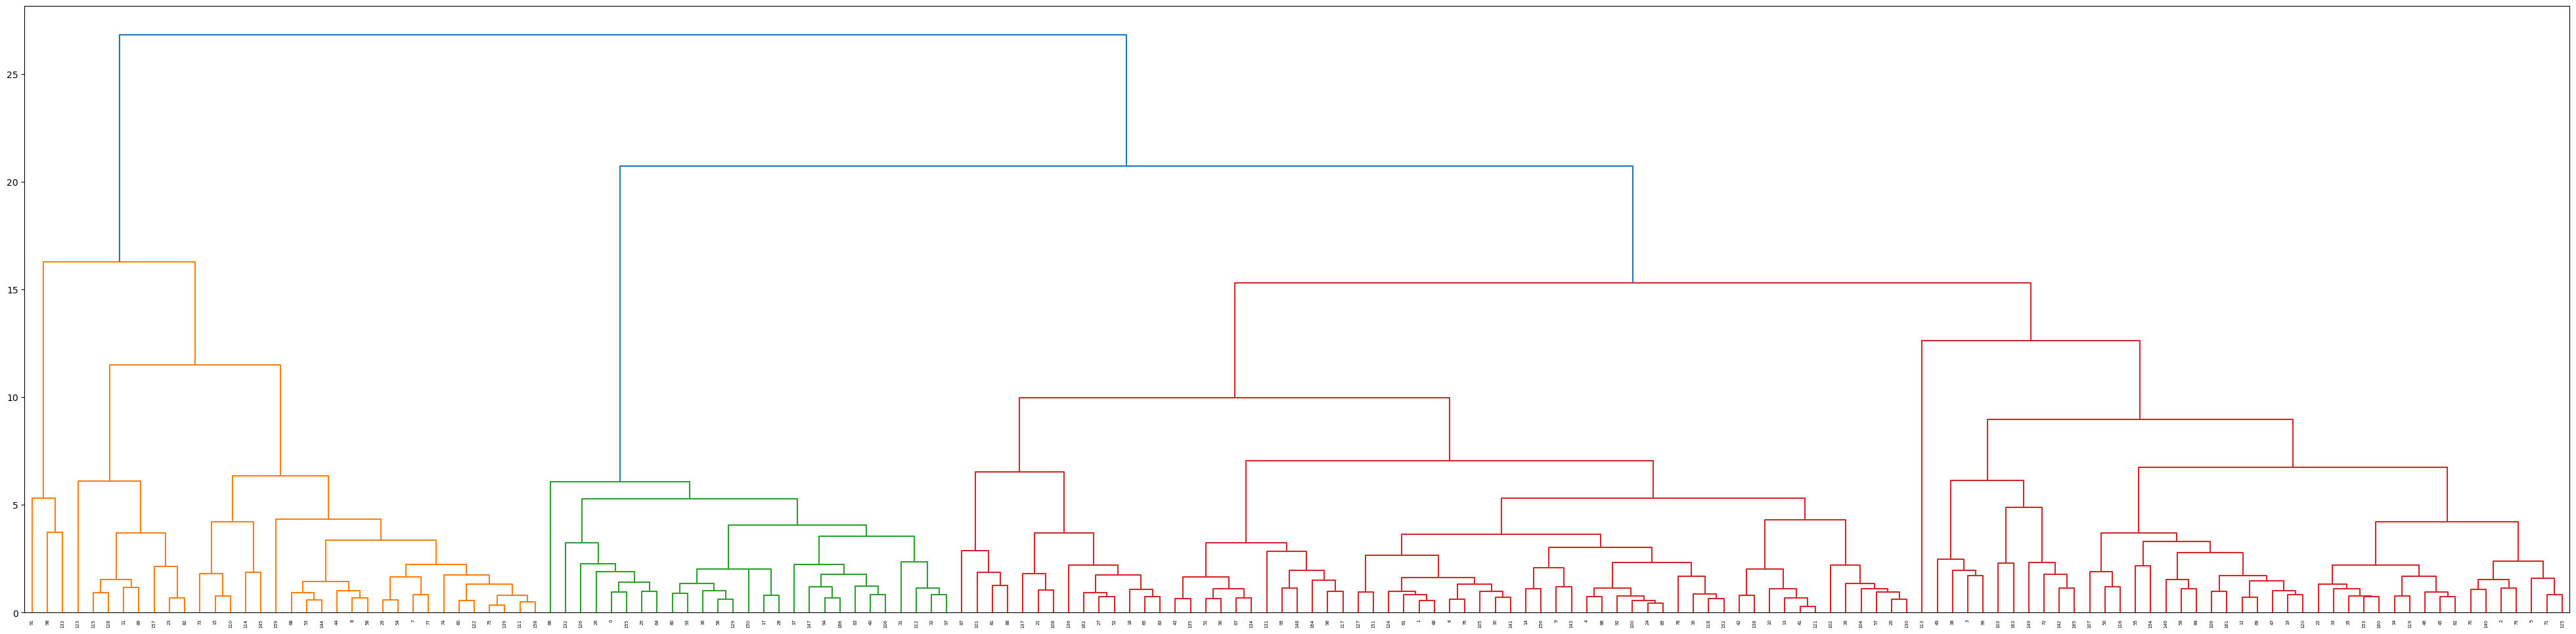

In [416]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_dados,method='ward'))

In [427]:
hcluster = AgglomerativeClustering(n_clusters=3)  
hcluster.fit_predict(scaled_dados)
hcluster_label = hcluster.labels_

In [428]:
hcluster_df = pd.DataFrame(dados)
hcluster_df['hcluster'] = hcluster_label
hcluster_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,clusters_dist,hcluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,3.707487,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0.837031,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1.414632,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,4.323613,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1.062536,1


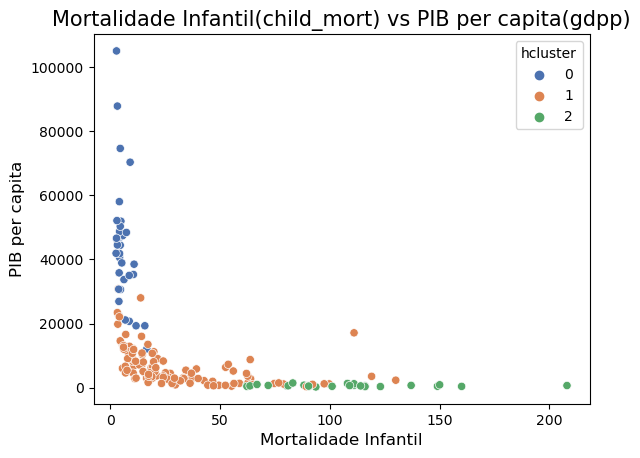

In [437]:
sns.scatterplot(data=hcluster_df, x="child_mort", y="gdpp", hue="hcluster", palette="deep")
plt.title("Mortalidade Infantil(child_mort) vs PIB per capita(gdpp)", fontsize=15)
plt.xlabel("Mortalidade Infantil", fontsize=12)
plt.ylabel("PIB per capita", fontsize=12)
plt.show()

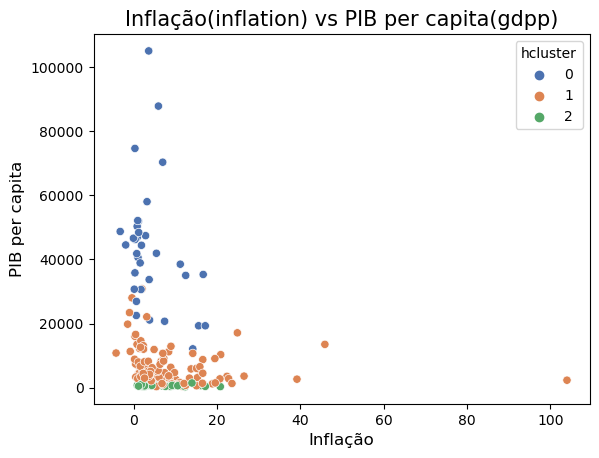

In [438]:
sns.scatterplot(data=hcluster_df, x="inflation", y="gdpp", hue="hcluster", palette="deep")
plt.title("Inflação(inflation) vs PIB per capita(gdpp)", fontsize=15)
plt.xlabel("Inflação", fontsize=12)
plt.ylabel("PIB per capita", fontsize=12)
plt.show()

In [436]:
pd.Series(hcluster_label).value_counts()

1    106
0     34
2     27
dtype: int64

#### Questão 2 - a - ii

In [390]:
data_filter = k.fit_transform(scaled_dados)

In [391]:
data_filter

array([[ 3.70748731,  1.0860896 ,  5.78155681],
       [ 0.83703077,  3.602306  ,  3.18403066],
       [ 1.41463189,  3.13222868,  3.74437502],
       [ 4.32361304,  2.26757607,  6.23511527],
       [ 1.06253633,  3.82116699,  2.50034165],
       [ 2.16492481,  3.68835234,  3.58887787],
       [ 1.11510231,  3.41424622,  3.77477065],
       [ 3.57530217,  5.43712616,  2.00759372],
       [ 3.52006029,  5.57865737,  0.94183635],
       [ 1.52274842,  3.06199495,  3.54982035],
       [ 1.68758762,  3.96093688,  1.91068234],
       [ 2.11334893,  4.37206936,  2.02504056],
       [ 1.94460476,  2.86315973,  4.55102662],
       [ 1.24265752,  3.87740564,  2.33528924],
       [ 1.33911565,  3.72752976,  3.2686538 ],
       [ 3.67392313,  5.65987085,  1.37769631],
       [ 1.13272617,  3.23360277,  3.39611964],
       [ 3.53195127,  1.50221812,  5.68556389],
       [ 1.23075706,  2.97804114,  3.70545116],
       [ 1.22191063,  2.33439938,  3.94622882],
       [ 2.12778387,  4.33088434,  3.141

In [392]:
cl = data_filter
kmeans_df = pd.DataFrame(dados)
kmeans_df['clusters_dist'] = cl
kmeans_df.head(167)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,clusters_dist
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,3.707487
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0.837031
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1.414632
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,4.323613
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1.062536
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1.612782
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,3.930755
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1.931093


In [393]:
# valor mínimo de cada país que tem o ponto mais próximo do centróide
min_dist = np.min(kmeans_df['clusters_dist'])
min_dist

0.7343794698368825

In [449]:
kmeans_df.country

AttributeError: 'DataFrame' object has no attribute 'country'